In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

lap_times_df = pd.DataFrame(data=pd.read_csv('data/lap_times.csv', dtype={'time': str}))
driver_ids_df = pd.DataFrame(data=pd.read_csv('data/drivers.csv', dtype={'driverRef': str, 'surname': str}))

In [64]:
# specify to 2022 mexico race
mexico_lap_times_df = lap_times_df.loc[lap_times_df['raceId'] == 1094]

# specify unique drivers during race
drivers = mexico_lap_times_df['driverId'].unique()

# function to get time from driver id
def get_lap_time(driver_id):

    driver_lap_times = mexico_lap_times_df.loc[mexico_lap_times_df['driverId'] == driver_id, 'milliseconds']
    
    return driver_lap_times

# function to get name from driver id
def get_driver_name(driver_id):

    driver_names = driver_ids_df.loc[driver_ids_df['driverId'] == driver_id, 'driverRef']

    return driver_names

drivers_dict = {}
name_dict = {}

for driver in drivers:
    name_dict[driver] = get_driver_name(driver)
    drivers_dict[driver] = get_lap_time(driver)


# updating drivers dict manually until we can pull names out cleanly from drivers.csv
drivers_dict['Verstappen'] = drivers_dict[830]
del drivers_dict[830]
drivers_dict['Hamilton'] = drivers_dict[1]
del drivers_dict[1]
drivers_dict['Perez'] = drivers_dict[815]
del drivers_dict[815]
drivers_dict['Russell'] = drivers_dict[847]
del drivers_dict[847]
drivers_dict['Sainz'] = drivers_dict[832]
del drivers_dict[832]
drivers_dict['Leclerc'] = drivers_dict[844]
del drivers_dict[844]
drivers_dict['Alsono'] = drivers_dict[4]
del drivers_dict[4]
drivers_dict['Bottas'] = drivers_dict[822]
del drivers_dict[822]
drivers_dict['Ocon'] = drivers_dict[839]
del drivers_dict[839]
drivers_dict['Norris'] = drivers_dict[846]
del drivers_dict[846]
drivers_dict['Tsunoda'] = drivers_dict[852]
del drivers_dict[852]
drivers_dict['Zhou'] = drivers_dict[855]
del drivers_dict[855]
drivers_dict['Ricciardo'] = drivers_dict[817]
del drivers_dict[817]
drivers_dict['Vettel'] = drivers_dict[20]
del drivers_dict[20]
drivers_dict['Stroll'] = drivers_dict[840]
del drivers_dict[840]
drivers_dict['Gasly'] = drivers_dict[842]
del drivers_dict[842]
drivers_dict['Shumacher'] = drivers_dict[854]
del drivers_dict[854]
drivers_dict['Magnussen'] = drivers_dict[825]
del drivers_dict[825]
drivers_dict['Albon'] = drivers_dict[848]
del drivers_dict[848]
drivers_dict['Latifi'] = drivers_dict[849]
del drivers_dict[849]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


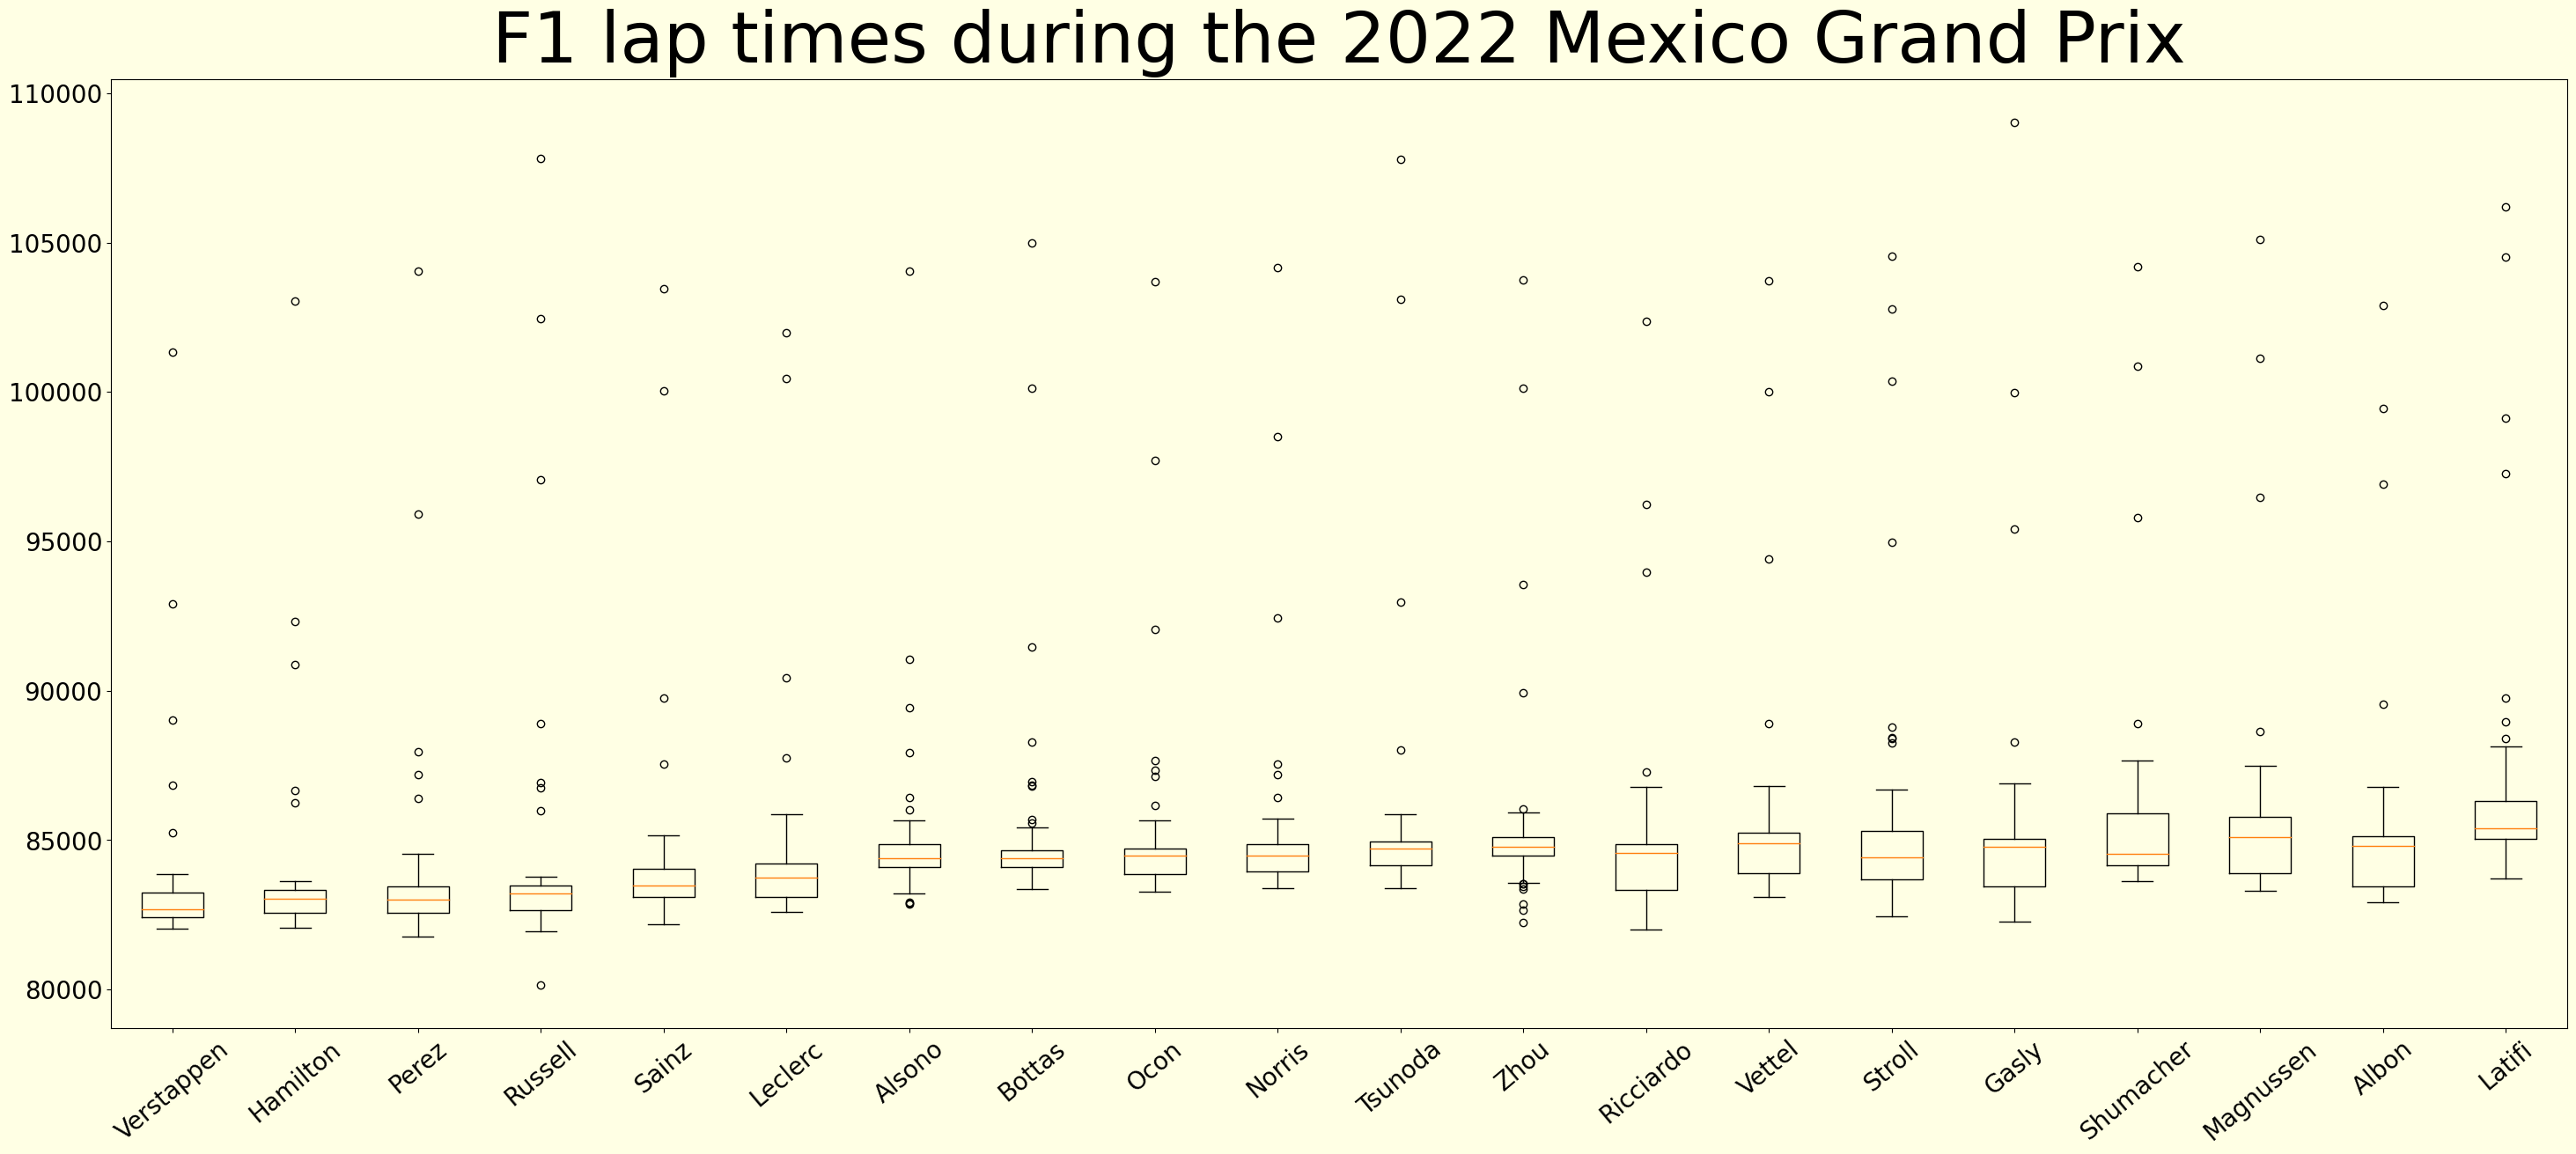

In [65]:
# plot this sucker

fc = '#ffffe4'
fig, ax = plt.subplots(figsize = (36, 14), facecolor = fc)
ax.boxplot(drivers_dict.values())
ax.tick_params(axis='y', labelsize=20)
ax.set_xticklabels(drivers_dict.keys(), fontsize = 20, rotation = 40)
ax.set_title('F1 lap times during the 2022 Mexico Grand Prix', fontsize = 58, y = 1.01)
ax.legend(facecolor = fc, frameon = False, fontsize = 54)
ax.set_facecolor(fc)
